In [2]:
from __future__ import division
import pandas as pd
import re, pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords, PlaintextCorpusReader

In [5]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.50)
project_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_project.csv").sample(frac = 0.50)
resource_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_resource.csv").sample(frac = 0.50)

In [6]:
teacher_survey_data_1 = teacher_survey_data[["teacher_hashed_id", "school_hashed_id", "q3_num_refugee_students", "q5b_refugee_academic_perf", "q6a_refugee_attendance", "q8b_refugee_services_only", "q9b_external_refugee_services_open_ended"]]
project_data_1 = project_data[["teacher_hashed_id", "school_hashed_id", "project_hashed_id", "project_essay_one", "project_essay_two", "project_impact_letter", "project_cost"]]
resource_data_1 = resource_data[["project_hashed_id", "resource_name", "resource_category", "resource_unit_price"]]

In [7]:
teachers_with_refugee_students = teacher_survey_data.loc[teacher_survey_data["q3_num_refugee_students"] > 0]

In [8]:
projects_refugees = pd.merge(teachers_with_refugee_students, project_data_1, how="right", on=['teacher_hashed_id'])
projects_refugees_orig = pd.merge(projects_refugees, resource_data_1, how = "right", on=['project_hashed_id'])
#projects_refugees_orig

In [9]:
projects_refugees_orig = projects_refugees_orig.dropna(subset=["q3_num_refugee_students"])
refugee_resources = projects_refugees_orig[["resource_name"]].to_csv("resources_for_refugee_classrooms.csv", encoding='utf-8', index=False)

In [10]:
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.3

nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
stop_words = nltk.corpus.stopwords.words('english')
new_stop_words = ["min", "subscriptions", "wi", "fi", "gb", "ram", "write", "wipe", "bk", "set", "gr", "assorted", "level", "extra", "amp", "intel", "celeron"] #after looking at the word cloud there were some other words that were in the description 
# in the item names that weren't really meaningful 
stop_words.extend(new_stop_words)

STOPWORDS = set(stop_words)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yejinkwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
resource_data[["resource_name"]] = resource_data[["resource_name"]].astype(str) 
resources = resource_data["resource_name"]
prepared_resources = resources.map(text_prepare)

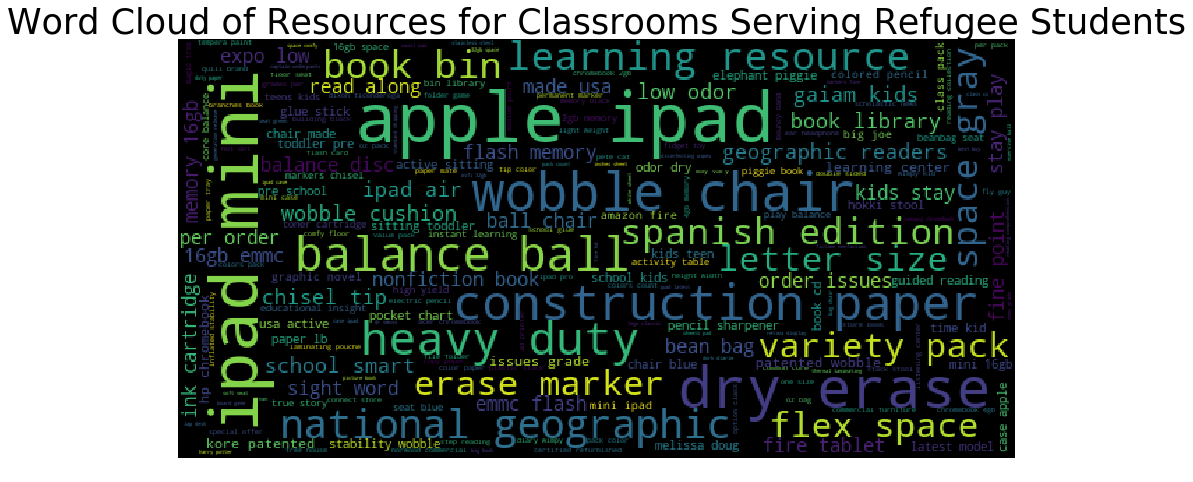

In [12]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(map(str, prepared_resources)))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Resources for Classrooms Serving Refugee Students", fontsize=35)
plt.axis("off")
plt.show()